# 1. Dot Product

Write a function `matrix_multiply(A, B)` using for loops, `+` and `*` that takes in two matrices (can be list of lists, or 2d numpy array) and returns their dot product (matrix multiplication). It should work with column vectors ($k \times 1$ dimensions) and row vectors ($1 \times k$) normally.


```import numpy as np

A = [
    [1,2,3],
    [4,5,6]
]

B = [
    [1,2,3],
    [4,5,6],
    [7,8,9]
]

matrix_multiply(A,B)

RETURNS: 
[[30, 36, 42],
 [66, 81, 96]]

---------example 2-------------
# This is a row vector
A = np.array([
    [1,2,3]
])

# This is a column vector
B = np.array([
    [1],
    [4],
    [7]
])

matrix_multiply(A,B)

RETURNS:
[[30]]

```

Use `np.dot` to test your output

In [1]:
import numpy as np

def matrix_multiply(A_in,B_in):
    """
    Perform matrix multiplication.
    
    Inputs:
    A : n x k matrix
    B : k x m matrix
    
    Outputs:
    C : n x m matrix
    """
    # convert to numpy arrays
    A = np.array(A_in)
    B = np.array(B_in)
    
    # extract the array dimensions
    n, k = np.shape(A)
    k2, m = np.shape(B)
    
    # check if multiplication is possible
    # i.e. inner dimensions are equal.
    assert k == k2, "Error: inner dimensions of matrices are not compatible for multiplication."
    
    # create output matrix
    C = np.zeros((n, m))
    
    for i in range(n):
        for j in range(m):
            for l in range(k):
                C[i,j] += A[i,l] * B[l,j]
    
    return C


In [2]:
A = [
    [1,2,3],
    [4,5,6]
]

B = [
    [1,2,3],
    [4,5,6],
    [7,8,9]
]

matrix_multiply(A,B)

array([[30., 36., 42.],
       [66., 81., 96.]])

In [3]:
# This is a row vector
A = np.array([
    [1,2,3]
])

# This is a column vector
B = np.array([
    [1],
    [4],
    [7]
])

matrix_multiply(A,B)

array([[30.]])

# 2 Matrix Math torture

**2.1** Give a 3 examples of non-invertible square matrices that are non-zero

**2.2** Explain why the identity matrix $I$ is necessarily a square matrix with only $1$'s on the diagonal (hint: use the dot product from Q1)

**2.3** The **trace** is commutative for two matrices so $tr(AB) = tr(BA)$. Give an example where this is false for 3 matrices which can all be multiplied together.

**2.4** Give an example of a nonzero $4 \times 4$ idempotent matrix (where $A \cdot A = A^2 = A$)

**2.5** solve the following system of equations for `x`, `y` and `z` using matrices and `numpy.linalg.solve`

$$x 	+ 	y 	+ 	z 	= 	6$$

  	  	$$2y 	+ 	5z 	= 	−4$$

$$2x 	+ 	5y 	− 	z 	= 	27$$

In [4]:
# 2.1 Give a 3 examples of non-invertible square matrices that are non-zero
a = np.array([
    [1, 3, 9],
    [2, 6, 18],
    [3, 4, 7]]
)
b = np.array([
    [1, 3, 9],
    [2, 6, 9],
    [3, 9, 7]]
)
c = np.array([
    [1, 4, 4],
    [2, 5, 8],
    [3, 7, 12]]
)
np.linalg.det([a, b, c])

array([0., 0., 0.])

In [5]:
# 2.2 Explain why the identity matrix 𝐼 is necessarily a square matrix 
#     with only 1's on the diagonal (hint: use the dot product from Q1)

# We seek a matrix for which : I x A will equal A
# in terms of matrix dimensions then, we need the following:
#      I        x      A       =      A
#   (k x p)         (n x m)    =    (n x m)
#      ----->   (k x m)   =    (n x m)
# from the matrix rules of multiplication, we infer that:
#          p = n   (inner dimensions must match)
#          k = n   (result row dimension must equal first matrix row dimension)
#  Therefore, I must be an (n x n) matrix.
#
#  Again, when looking at the dynamics of matrix multiplication:
#  result[i,j] = I[i,0] * A[0,j] + I[i,1] * A[1,j] + ... 
#                + I[i,i] * A[i,j] + 
#                                    ...  +  I[i,n] * A[n,j]  
# and result[i,j] must equal A[i,j] which means that all I[i,*] 
# are identically equal to 0 except I[i,i] which must equal to 1
# in order to return A[i,j].
#
# This implies a matrix where all the diagonals (I[i,i]) are 1 
# and all the non-diagonals (I[i,j] for i != j) are zero.

In [6]:
# 2.3 The trace is commutative for two matrices so 𝑡𝑟(𝐴𝐵)=𝑡𝑟(𝐵𝐴). Give an example where this 
#     is false for 3 matrices which can all be multiplied together.
A = np.array([
    [1,2,3],
    [4,5,6],
    [5,7,4]]
)

B = np.array([
    [1,2,3],
    [4,5,6],
    [7,8,9]]
)

C = np.array([
    [4,7,3],
    [4,5,4],
    [7,8,9]]
)
np.trace(A @ B @ C), np.trace(C @ B @ A)

(3521, 3363)

In [7]:
# 2.4 Give an example of a nonzero 4×4 idempotent matrix (where 𝐴⋅𝐴=𝐴2=𝐴)
A = np.array([
    [1, 0, 0, 0],
    [0, 1, 0, 0],
    [0, 0, 1, 0],
    [0, 0, 0, 1]]
)

A, (A @ A)

(array([[1, 0, 0, 0],
        [0, 1, 0, 0],
        [0, 0, 1, 0],
        [0, 0, 0, 1]]),
 array([[1, 0, 0, 0],
        [0, 1, 0, 0],
        [0, 0, 1, 0],
        [0, 0, 0, 1]]))

In [8]:
# 2.5 solve the following system of equations for x, y and z using matrices and numpy.linalg.solve
#                  𝑥 + 𝑦 + 𝑧 = 6
#                     2y + 5z = −4
#                  2𝑥 + 5𝑦 − 𝑧 = 27

A = np.array([
    [1, 1, 1],
    [0, 2, 5],
    [2, 5, -1]]
)
y = np.array([6, -4, 27])

np.linalg.solve(A,y)

array([ 5.,  3., -2.])

# 3.1 Boston regression

Using statsmodels and the `boston` dataset, make a regression model to predict house prices. Don't forget to add a constant (intercept) term. Note that statsmodels can take a `pd.DataFrame` as an input for `X`.

Report the $R^2$ and coefficients on each feature

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.datasets import load_boston

In [10]:
cols = list(load_boston()['feature_names'])
X, y = load_boston(return_X_y=True)
X = sm.add_constant(X)
cols.append('MEDV')
cols.insert(0,'const')
df = pd.DataFrame(data=np.hstack((X,np.reshape(y,(506,1)))), columns=cols)
#df['MEDV']=1000*df['MEDV']
df

,const,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,1.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,1.0,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,1.0,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,1.0,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,1.0,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,1.0,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,1.0,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,1.0,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,1.0,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [11]:
X_train = df.drop('MEDV',axis=1)
y_train = df['MEDV']

est = sm.OLS(y_train, X_train).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Thu, 07 Jan 2021   Prob (F-statistic):          6.72e-135
Time:                        17:14:58   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
print(f"The coefficients for the regression are given by:\n\n{est.params}")

The coefficients for the regression are given by:

const      36.459488
CRIM       -0.108011
ZN          0.046420
INDUS       0.020559
CHAS        2.686734
NOX       -17.766611
RM          3.809865
AGE         0.000692
DIS        -1.475567
RAD         0.306049
TAX        -0.012335
PTRATIO    -0.952747
B           0.009312
LSTAT      -0.524758
dtype: float64


In [13]:
print(f"The R-squared is: {est.rsquared:.3f}")

The R-squared is: 0.741


# 3.2 Polynomial features

Use polynomial features to improve your regression model in `2.1`. You can use squared and cubic features. Try to find a model that minimizes the `AIC` or `BIC` of your output table.

In [14]:
df2 = df.copy()
df2['RM_2'] = df2['RM'] * df2['RM']
df2['DIS_2'] = df2['DIS'] * df2['DIS']
df2['DIS_3'] = df2['DIS'] * df2['DIS'] * df2['DIS']
df2['LSTAT_2'] = df2['LSTAT'] * df2['LSTAT']
df2['LSTAT_3'] = df2['LSTAT'] * df2['LSTAT'] * df2['LSTAT']
df2['CRIM_2'] = df2['CRIM'] * df2['CRIM']
df2['CRIM_3'] = df2['CRIM'] * df2['CRIM'] * df2['CRIM']
df2['PTRATIO_2'] = df2['PTRATIO'] * df2['PTRATIO']
df2['ZN_3'] = df2['ZN'] * df2['ZN'] * df2['ZN']
df2['B_3'] = df2['B'] * df2['B'] * df2['B']

X_train = df2.drop('MEDV',axis=1)
y_train = df2['MEDV']

est = sm.OLS(y_train, X_train).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     106.6
Date:                Thu, 07 Jan 2021   Prob (F-statistic):          1.59e-172
Time:                        17:15:47   Log-Likelihood:                -1383.3
No. Observations:                 506   AIC:                             2815.
Df Residuals:                     482   BIC:                             2916.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        165.7739     16.543     10.021      0.000     133.269     198.278
CRIM          -0.7176      0.157     -4.585      0.000      -1.025      -0.410
ZN            -0.0522      0.023     -2.313      0.021      -0.096      -0.008
INDUS          0.0159      0.051      0.311      0.756      -0.084       0.116
CHAS           2.4090      0.703      3.427      0.001       1.028       3.790
NOX          -25.1112      3.431     -7.319      0.000     -31.853     -18.370
RM           -18.7110      2.750     -6.805      0.000     -24.114     -13.308
AGE           -0.0026      0.012     -0.222      0.825      -0.025       0.020
DIS           -5.8281      1.312     -4.442      0.000      -8.406      -3.250
RAD            0.4888      0.068      7.140      0.000       0.354       0.623
TAX           -0.0146      0.003     -4.692      0.000      -0.021      -0.008
PTRATIO       -5.1954      1.527     -3.402      0.001      -8.196      -2.195
B              0.0166      0.007      2.470      0.014       0.003       0.030
LSTAT         -1.9565      0.287     -6.813      0.000      -2.521      -1.392
RM_2           1.6960      0.215      7.893      0.000       1.274       2.118
DIS_2          0.7162      0.232      3.093      0.002       0.261       1.171
DIS_3         -0.0310      0.013     -2.435      0.015      -0.056      -0.006
LSTAT_2        0.0659      0.017      3.811      0.000       0.032       0.100
LSTAT_3       -0.0008      0.000     -2.563      0.011      -0.001      -0.000
CRIM_2         0.0141      0.005      2.782      0.006       0.004       0.024
CRIM_3     -8.976e-05   4.26e-05     -2.108      0.036      -0.000   -6.09e-06
PTRATIO_2      0.1250      0.043      2.911      0.004       0.041       0.209
ZN_3         7.14e-06   2.69e-06      2.654      0.008    1.85e-06    1.24e-05
B_3         -5.94e-08   3.49e-08     -1.702      0.089   -1.28e-07    9.17e-09
==============================================================================
Omnibus:                      130.198   Durbin-Watson:                   1.224
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2437.334
Skew:                           0.585   Prob(JB):                         0.00
Kurtosis:                      13.688   Cond. No.                     5.41e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.41e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# 3.3 Feature plotting

Now that you have a better model, make a regression figure plot for the important feature. The regression plot should be like the ones made at the end of part 3 of this lecture (scatterplot + regression line). It should have the following:

- Have the `x` axis be the values from one of your important features. The values should range from the `[min, max]` of the observed values in the dataset.

- The y axis on each chart is the target value (house price)

- You should have a scatter plot of the datapoints for the feature + the regression line of predicted values on each

- If you used non-linearities (squared and/or cube input) the regression curve should be nonlinear as well

- When plotting values for a single variable, you can set all the other values to their `mean` or `median` when you put them in your model's prediction

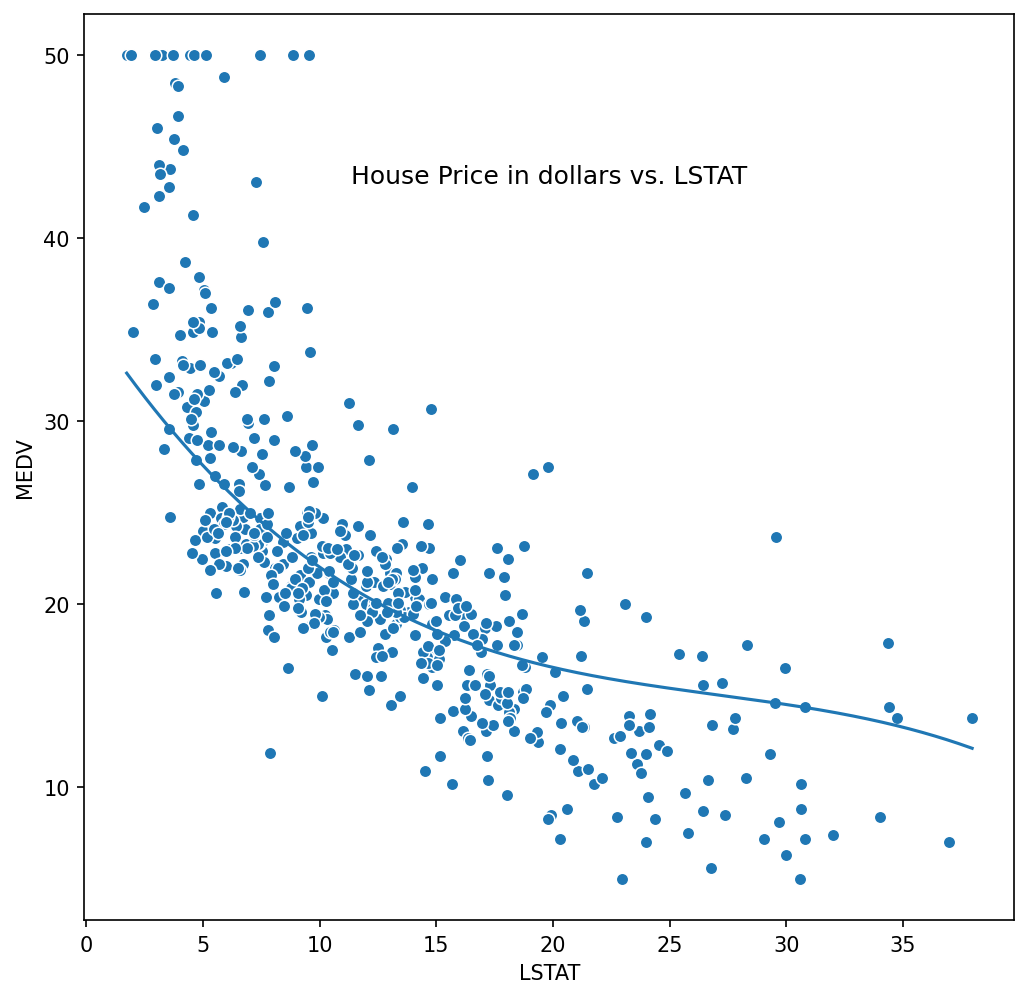

In [15]:
means = df2.drop('MEDV',axis=1).describe().T['mean']
medians = df2.drop('MEDV',axis=1).describe().T['50%']

fig, ax = plt.subplots(dpi=150,figsize=(8,8))
sns.scatterplot(data=df2,x='LSTAT',y='MEDV')
xmin, xmax = (min(df2['LSTAT']),max(df2['LSTAT']))

x_train = medians.values.reshape(24,1) * np.ones((1,1000))
xfit = np.linspace(xmin, xmax, 1000)
xfit2 = xfit * xfit
xfit3 = xfit2 * xfit
x_train[13,:] = xfit  # this is the feature
x_train[17,:] = xfit2 # this is the feature squared
x_train[18,:] = xfit3 # this is the feature cubed

yfit = est.predict(x_train.T)
plt.plot(xfit, yfit)
ax.set_title('House Price in dollars vs. LSTAT',x=0.5,y=0.8);

# 3.4 Multi-feature plotting

Make a single matplotlib `figure` object with the same chart as in **2.4** but with 4 charts instead for your 4 most important features. 

Do not copy-paste code for each feature you visualize in the plot. Extract your code into a function so you can just have something like

```python
fix, ax1, ax2, ax3, ax4 = plt.subplots((2,2))
reg_plot_on_ax(feature_1, ax1)
reg_plot_on_ax(feature_2, ax2)
reg_plot_on_ax(feature_3, ax3)
reg_plot_on_ax(feature_4, ax4)
```

In [16]:
def reg_plot_on_ax(key, ax):
    """
    Creates a scatter plot along with
    a fitted plot for "feature" on subplot
    "ax".
    
    Inputs:
    key: the feature from dataframe df
    ax: the subplot axes to plot upon
    
    Note:
    Assumes the following logic:
        if "key_2" exists, then we have key^2
        if "key_3" exists, then we have key^3
    """
    
    # define global vars
    global df2, medians, means
    
    # define possible extension names for features
    add_ons = ['_2', '_3']
    
    # produce the scatter plot
    sns.scatterplot(data=df2,
                    x=key,
                    y='MEDV',
                    ax=ax)
    
    # retrieve the max and min values
    xmin, xmax = (min(df2[key]),max(df2[key]))
    
    # create the basic x matrix
    x_train = medians.values.reshape(24,1) * np.ones((1,1000))
#    x_train = means.values.reshape(24,1) * np.ones((1,1000))
    # create the basic fitting x vector
    xfit = np.linspace(xmin, xmax, 1000)
    
    # replace the basic variable in the x-matrix
    indx = list(medians.index).index(key)
    x_train[indx,:] = xfit  # this is the feature
    
    # look for a polynomial expression
    for suffx in add_ons:
        try:
            indx = list(medians.index).index(key+suffx)
            if suffx == '_2':
                xfit_o = xfit * xfit
            elif suffx == '_3':
                xfit_o = xfit * xfit * xfit
            # replace the poly term in the x matrix
            x_train[indx,:] = xfit_o 
        except ValueError:
            pass

    yfit = est.predict(x_train.T)
    sns.lineplot(x=xfit,y=yfit,ax=ax)

In [17]:
df2.corr()['MEDV'].sort_values()

LSTAT       -0.737663
LSTAT_2     -0.622179
LSTAT_3     -0.512916
PTRATIO_2   -0.510658
PTRATIO     -0.507787
INDUS       -0.483725
TAX         -0.468536
NOX         -0.427321
CRIM        -0.388305
RAD         -0.381626
AGE         -0.376955
CRIM_2      -0.218837
CRIM_3      -0.149662
DIS_3        0.146957
CHAS         0.175260
DIS_2        0.195869
DIS          0.249929
ZN_3         0.294616
B_3          0.330596
B            0.333461
ZN           0.360445
RM           0.695360
RM_2         0.718169
MEDV         1.000000
const             NaN
Name: MEDV, dtype: float64

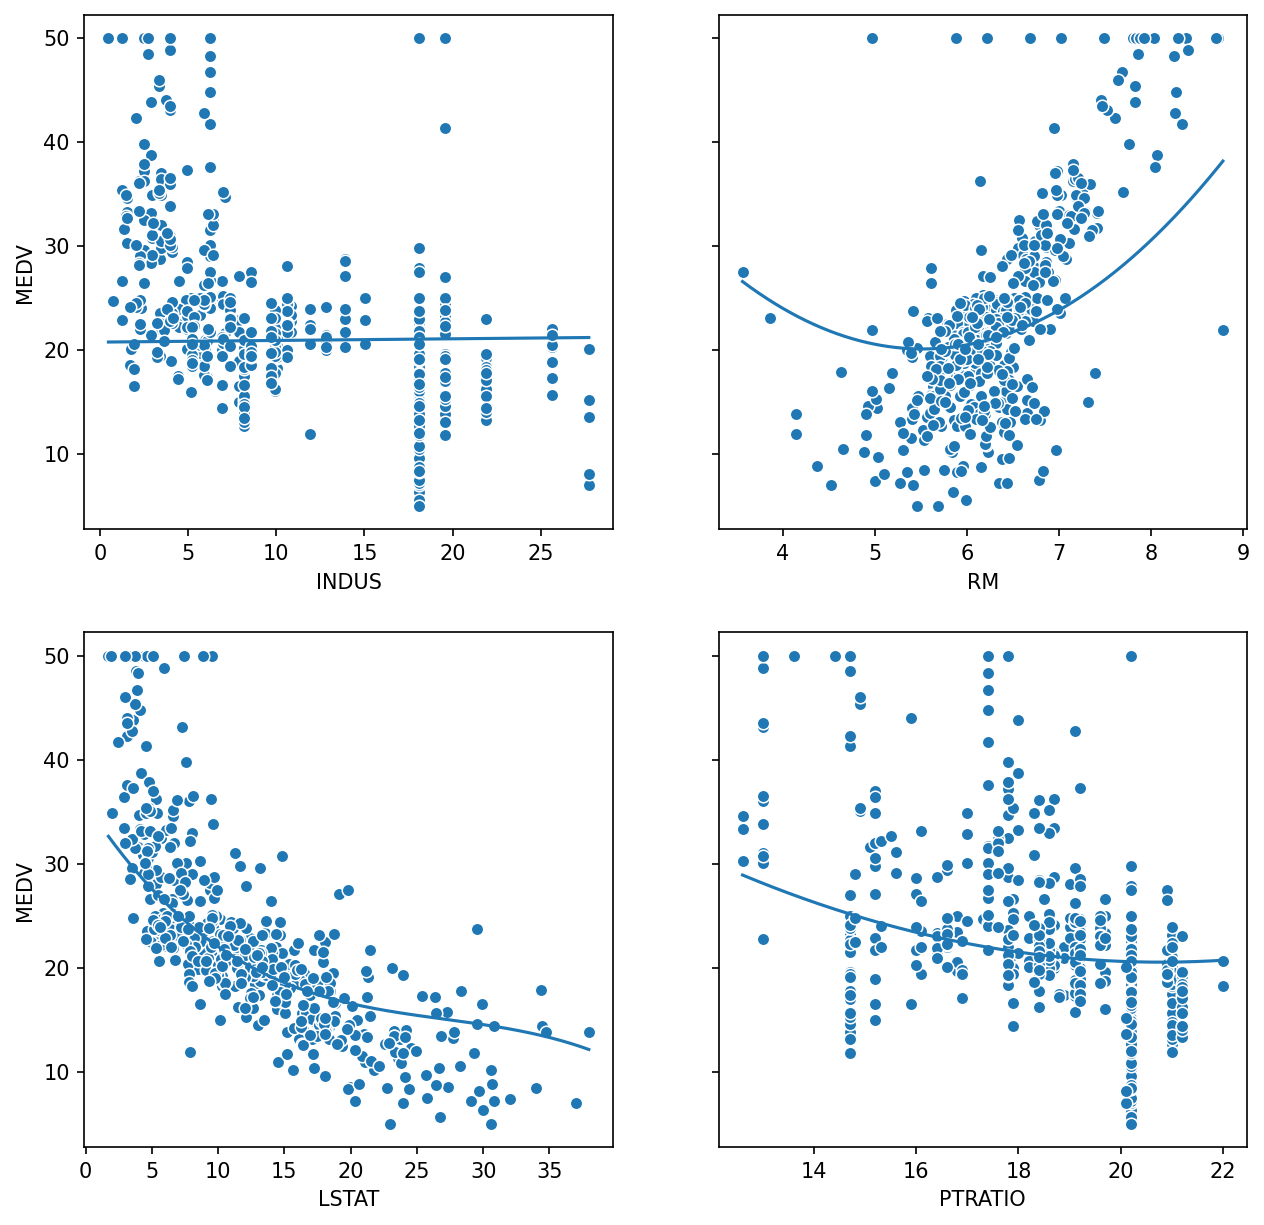

In [18]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2,dpi=150,figsize=(10,10),sharey='row')
reg_plot_on_ax('INDUS', ax1)
reg_plot_on_ax('RM', ax2)
reg_plot_on_ax('LSTAT', ax3)
reg_plot_on_ax('PTRATIO', ax4)